In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [9]:
# Create the inspector and connect it to the engine
inspector = inspect(engine)


# Exploratory Precipitation Analysis

In [10]:

# Using the inspector to print the column names for Measurement
measurement_columns = inspector.get_columns('measurement')
print("Measurement Table")
for column in measurement_columns:
    print(column['name'], column["type"])



Measurement Table
id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [11]:
# Using the inspector to print the column names for Station
station_columns = inspector.get_columns('station')
print("Station Table")
for column in station_columns:
    print(column['name'], column["type"])

Station Table
id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [12]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(f"Most recent date is: {recent_date[0]}")

Most recent date is: 2017-08-23


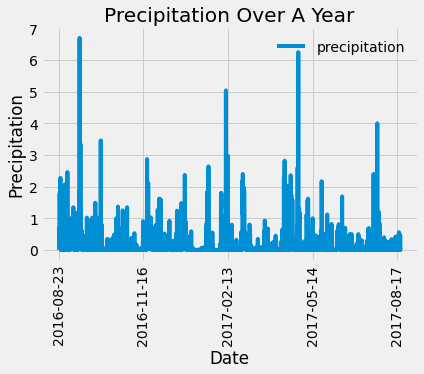

<Figure size 432x288 with 0 Axes>

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

new_rec_date = dt.datetime.strptime(recent_date[0], '%Y-%m-%d')
new_rec_date.strftime('%Y-%m-%d')


# Calculate the date one year from the last date in data set.

one_year_date = (new_rec_date - dt.timedelta(days=365)).strftime('%Y-%m-%d')
one_year_date

# Perform a query to retrieve the data and precipitation scores
prcp_query_year = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= one_year_date).\
                                                                    filter(Measurement.date <= new_rec_date).all()
prcp_query_year

# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_scores_df = pd.DataFrame(prcp_query_year).set_index("date")
prcp_scores_df.rename(columns={'prcp':'precipitation'},inplace =True)
prcp_scores_df.head()

#drop null values
prcp_scores_df.dropna(inplace=True)

# # Sort the dataframe by date

prcp_scores_df.sort_index(inplace = True)
prcp_scores_df

# # Use Pandas Plotting with Matplotlib to plot the data

#plot the data
prcp_scores_df.plot(rot=90)

#Format the plotted data
plt.xlabel("Date")
plt.ylabel("Precipitation")
plt.title("Precipitation Over A Year")
plt.grid(True)
plt.legend(loc='upper right', frameon=False)

#display data
plt.show()
plt.savefig("Precipitation Over A Year.png")



In [14]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp_scores_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [15]:
# Design a query to calculate the total number stations in the dataset
station_count = session.query(Station.id).count()
print(f"The total number of stations is: {station_count}")

The total number of stations is: 9


In [16]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_stations = session.query(Station.name, Measurement.station, func.count(Measurement.station)).\
                                                    filter(Measurement.station == Station.station).\
                                                    group_by(Measurement.station).\
                                                    order_by(func.count(Measurement.date).desc()).all()
active_stations

[('WAIHEE 837.5, HI US', 'USC00519281', 2772),
 ('WAIKIKI 717.2, HI US', 'USC00519397', 2724),
 ('KANEOHE 838.1, HI US', 'USC00513117', 2709),
 ('WAIMANALO EXPERIMENTAL FARM, HI US', 'USC00519523', 2669),
 ('MANOA LYON ARBO 785.2, HI US', 'USC00516128', 2612),
 ('KUALOA RANCH HEADQUARTERS 886.9, HI US', 'USC00514830', 2202),
 ('HONOLULU OBSERVATORY 702.2, HI US', 'USC00511918', 1979),
 ('PEARL CITY, HI US', 'USC00517948', 1372),
 ('UPPER WAHIAWA 874.3, HI US', 'USC00518838', 511)]

In [17]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
low_temp = session.query(func.min(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
high_temp = session.query(func.max(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
avg_temp = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()

print(f"The lowest temperature is: {low_temp[0][0]}")
print(f"The highest temperature is: {high_temp[0][0]}")
print(f"The average temperature is: {avg_temp[0][0]}")


The lowest temperature is: 54.0
The highest temperature is: 85.0
The average temperature is: 71.66378066378067


In [18]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station
station_temp_year = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date >= one_year_date).\
                                                                    filter(Measurement.date <= new_rec_date).\
                                                                    filter(Measurement.station == 'USC00519281').all()



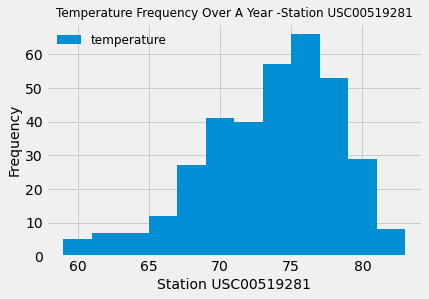

<Figure size 432x288 with 0 Axes>

In [19]:
#plot the results as a histogram

# Save the query results as a Pandas DataFrame and set the index to the date column
stat_temp_year_df = pd.DataFrame(station_temp_year)
stat_temp_year_df.rename(columns={'tobs':'temperature'},inplace =True)


#plot the data
stat_temp_year_df.plot.hist(bins=12)

#Format the plotted data
plt.xlabel("Station USC00519281",fontsize = 14)
plt.ylabel("Frequency",fontsize = 14)
plt.title("Temperature Frequency Over A Year -Station USC00519281", fontsize = 12)
plt.grid(True)
plt.legend(loc='upper left', frameon=False, fontsize = 12)

#display data
plt.show()
plt.savefig("Temperature Frequency Station USC00519281.png")

# Close session

In [20]:
# Close Session
session.close()